In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px


df = pd.read_csv('churn.csv')
df = df.drop(['RowNumber'], axis=1)

## Задание 9.1 

Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

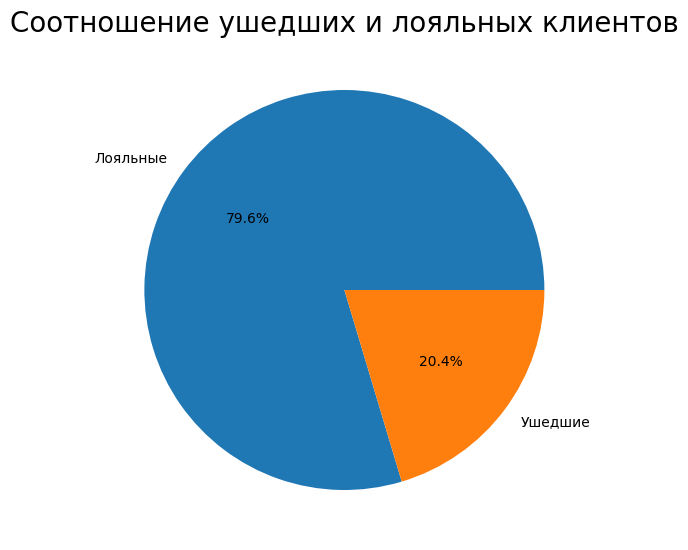

In [2]:
df_1 = df['Exited'].value_counts()

fig_1 = plt.figure(figsize=(5, 5))
axes_1 = fig_1.add_axes([0, 0, 1, 1])
axes_1.pie(df_1,
        labels=['Лояльные', 'Ушедшие'],
        autopct='%.1f%%');

axes_1.set_title('Соотношение ушедших и лояльных клиентов', fontsize=20);

Круговая диаграмма показала, что лояльных клиентов примерно в 4 раза больше, чем ушедших.

## Задание 9.2

Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

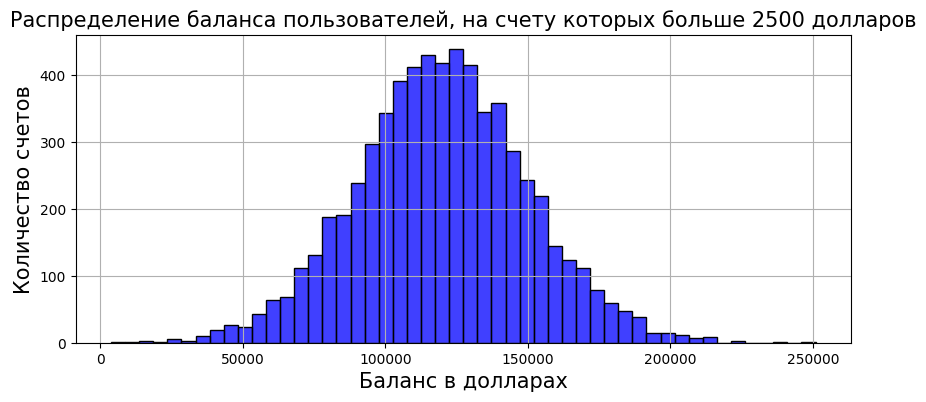

In [3]:
df_2 = df[df['Balance'] > 2500]


fig_2 = plt.figure(figsize=(10, 4))
axes_2 = sns.histplot(
    data=df_2,
    x='Balance',
    bins=50,
    color='Blue');

axes_2.set_title('Распределение баланса пользователей, на счету которых больше 2500 долларов', fontsize=15);
axes_2.set_xlabel('Баланс в долларах', fontsize=15);
axes_2.set_ylabel('Количество счетов', fontsize=15);
axes_2.grid()

На гистограмме можем наблюдать нормальное распределение. Большинство клиентов имеет на балансе  от 100000 до 150000 долларов.

## Задание 9.3

Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

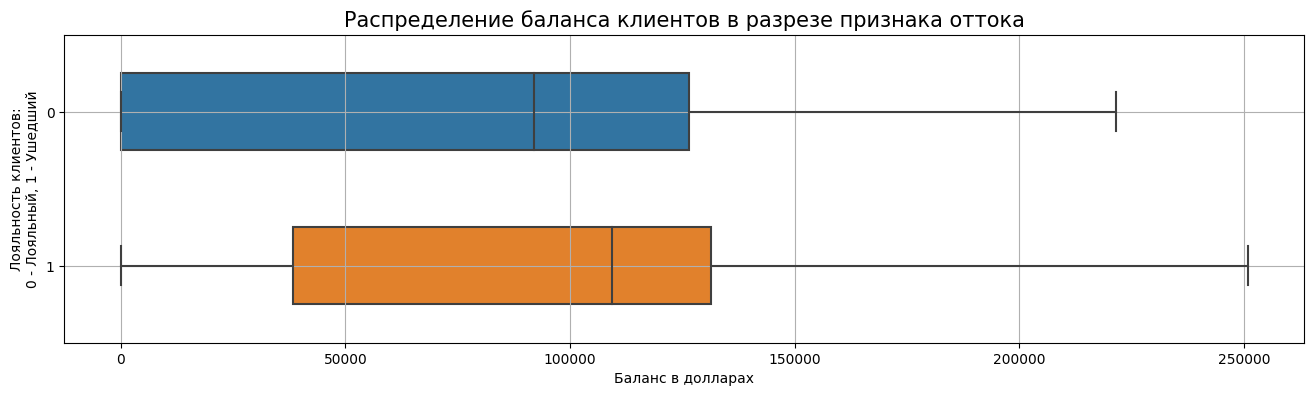

In [4]:
fig_3 = plt.figure(figsize=(16, 4))

axes_3 = sns.boxplot(
    data=df,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.5
);

axes_3.set_title('Распределение баланса клиентов в разрезе признака оттока', fontsize=15);
axes_3.set_xlabel('Баланс в долларах', fontsize=10);
axes_3.set_ylabel('''Лояльность клиентов:
0 - Лояльный, 1 - Ушедший''', fontsize=10, loc='center');
axes_3.grid()

Распределение счетов ушедших клиентов лежит в более плотном промежутке, чем у лояльных клиентов. Медианное значение ушедших клиентов выше, чем у лояльных клиентов (110000 и 90000 соответственно). Можно сделать вывод, что в среднем ушедшие клиенты состоятельнее лояльных. Возможно, у банка недостаточно выгодные предложения для крупных денежных сумм или же клиенты достигли определенных целей по накоплению (приобретение недвижимости, автомобиля и т.п.).

## Задание 9.4

Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

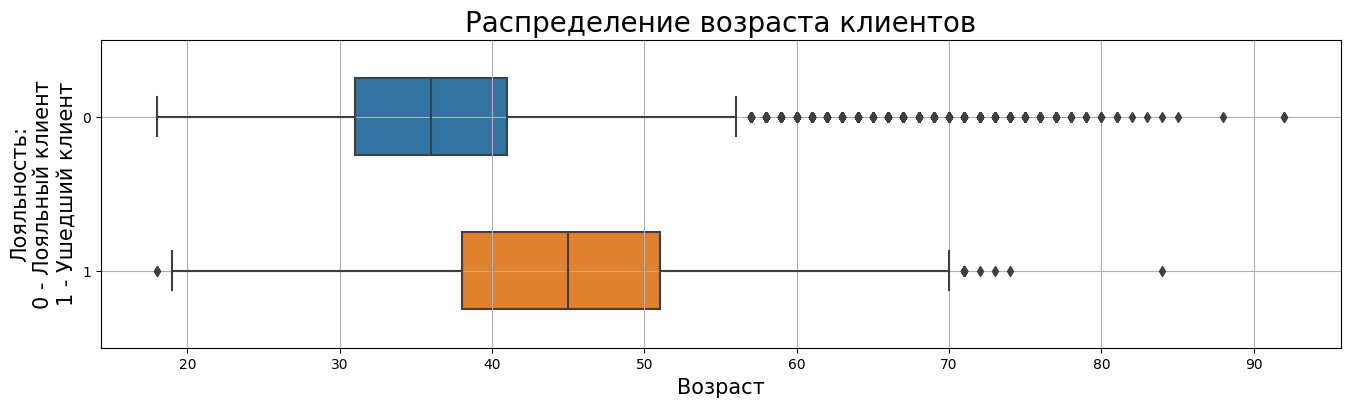

In [5]:
fig_4 = plt.figure(figsize=(16, 4))

axes_4 = sns.boxplot(
    data=df,
    x='Age',
    y='Exited',
    orient='h',
    width=0.5
);
axes_4.set_title('Распределение возраста клиентов', fontsize=20);
axes_4.set_xlabel('Возраст', fontsize=15);
axes_4.set_ylabel('''Лояльность:
0 - Лояльный клиент
1 - Ушедший клиент''', fontsize=15);
axes_4.grid()

Потенциальных выбросов больше среди лояльных клиентов. Возраст 80+ можно воспринимать как аномалии. Внимание следует обрать на группу в возрасте от 38 до 52 лет, так как наибольшая часть ушедших клиентов входит в этот диапазон.

## Задание 9.5

Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

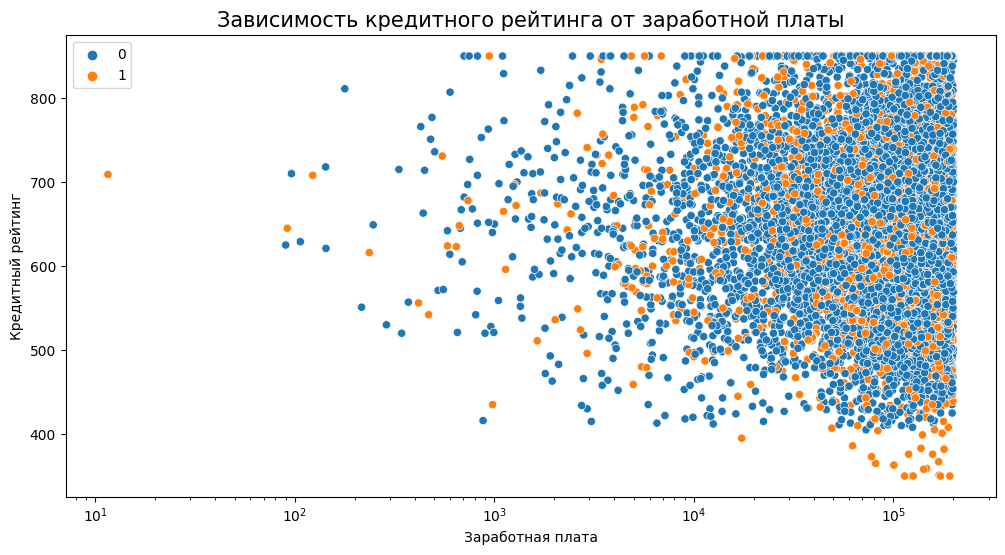

In [6]:
fig_5 = plt.figure(figsize=(12, 6))

axes_5 = sns.scatterplot(
    data=df,
    x='EstimatedSalary',
    y='CreditScore',
    hue='Exited'
);

axes_5.set_xscale('log');
axes_5.set_title('Зависимость кредитного рейтинга от заработной платы', fontsize=15);
axes_5.set_xlabel('Заработная плата', fontsize=10);
axes_5.set_ylabel('Кредитный рейтинг', fontsize=10);
axes_5.legend();

Явной взаимосвязи кредитного рейтинга и предпогалаемой зарплаты в разрезе признака оттока клиентов не наблюдается. По диаграмме видно, что клиенты с высокой заработной платой имеют как и высокй рейтинг, так и низкий. Метки как лояльных, так и ушедших клиентов распределены в одной и той же области графика.

## Задание 9.6

Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

### Вариант 1. Построение круговой диаграммы на основе таблицы, где после фильтрации остаются только ушедшие клиенты.

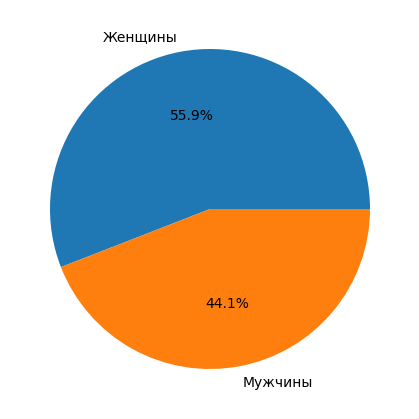

In [7]:
df_6_1 = df[df['Exited'] == 1]['Gender'].value_counts()

fig_6_1 = plt.figure(figsize=(4, 4))

axes_6_1 = fig_6_1.add_axes([0, 0, 1, 1])
axes_6_1.pie(
    df_6_1,
    labels=['Женщины', 'Мужчины'],
    autopct='%.1f%%'
);

Среди всех ушедших клиентов женщин больше чем мужчина на 11,8%.

### Вариант 2. Здесь рассматриваем отношение числа ушедших мужчин и женщин к общему числу клиентов.

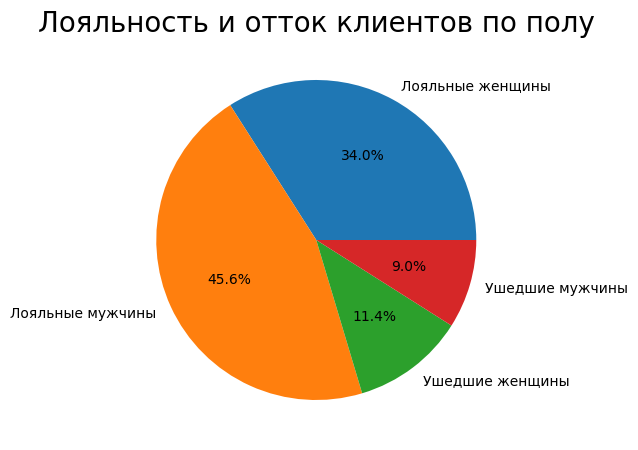

In [8]:
df_6_2 = df.groupby(['Exited', 'Gender'])['Gender'].count()

fig_6_2 = plt.figure(figsize=(4, 4))
axes_6_2 = fig_6_2.add_axes([0, 0, 1, 1])
axes_6_2.pie(
    df_6_2,
    labels = ['Лояльные женщины', 'Лояльные мужчины', 'Ушедшие женщины', 'Ушедшие мужчины'],
    autopct='%.1f%%'
);

axes_6_2.set_title('Лояльность и отток клиентов по полу', fontsize=20);

Круговая диаграмма показала, что среди ушедших клиентов женщин больше чем мужчин на 2,4%

## Задание 9.7

Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

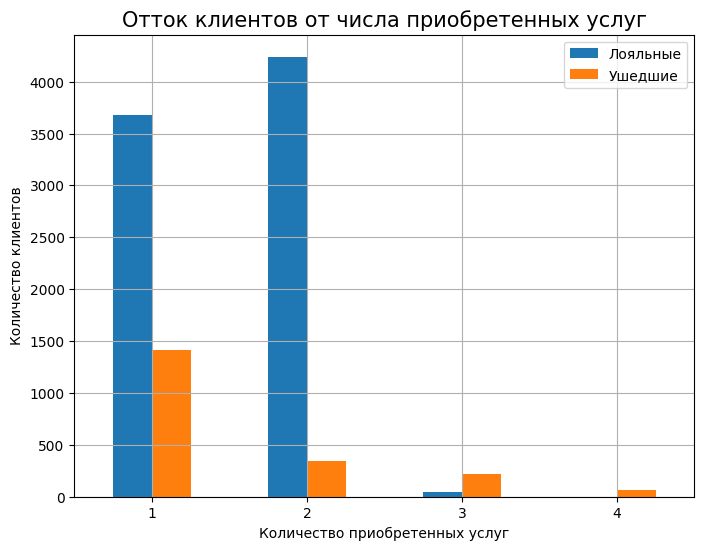

In [9]:
df_7 = df.pivot_table(
    values = 'CustomerId',
    index = ['NumOfProducts'],
    columns = ['Exited'],
    aggfunc='count',
    fill_value=0
)

df_7.columns = ['Лояльные', 'Ушедшие']

fig_7, axes_7 = plt.subplots(figsize=(8, 6))
df_7.plot(
    kind='bar',
    ax=axes_7,
    rot=0
);

axes_7.set_title('Отток клиентов от числа приобретенных услуг', fontsize=15);
axes_7.set_xlabel('Количество приобретенных услуг', fontsize=10);
axes_7.set_ylabel('Количество клиентов', fontsize=10);
axes_7.grid()

Чем меньше приобретено услуг, тем чаще уходят клиенты. Больше всего отток клиентов наблюдается в группе, в которой клиенты имеют одну приобретенную банковскую услугу. Но среди клиентов, у которых 3 и 4 приобретенные услуги, число ушедших на порядок больше, чем число лояльных.

## Задача 9.8

Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

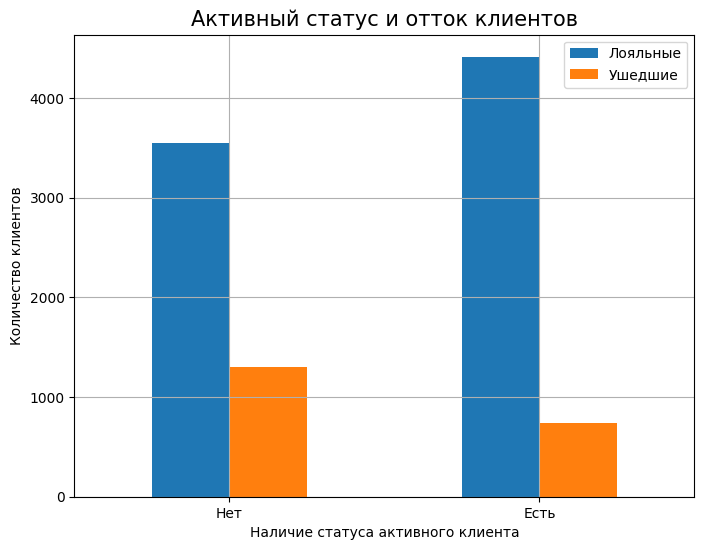

In [10]:
df_8 = df.pivot_table(
    values = 'CustomerId',
    index = 'IsActiveMember',
    columns = 'Exited',
    aggfunc = 'count',
    fill_value = 0
)

df_8.columns = ['Лояльные', 'Ушедшие']
df_8.index = ['Нет', 'Есть']

fig_8, axes_8 = plt.subplots(figsize=(8, 6))
df_8.plot(
    kind='bar',
    ax=axes_8,
    rot=0
);

axes_8.set_title('Активный статус и отток клиентов', fontsize=15);
axes_8.set_xlabel('Наличие статуса активного клиента', fontsize=10);
axes_8.set_ylabel('Количество клиентов', fontsize=10);
axes_8.grid()


Многоуровневая диаграмма показывает, что клиенты, имеющие статус активного клиента, уходят реже (1250 - нет статуса, 800 - есть статус).

Чтобы уменьшить отток среди неактивных клиентов, банк может попробовать стимулировать их вести более активную финансовую деятельность: различные подписки, бонусы за оплату картой банка в магазине, партнерство с медиасервисами/маркетплейсами.

## Задание 9.9

В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [11]:
# df_9 = df.groupby(['Geography'])[['Exited']].mean()
# display(df_9.index) 

In [21]:
df_9 = df.groupby(['Geography'])[['Exited']].mean()

df_9['Exited'] = df_9['Exited'].apply(lambda x: x * 100)
df_9.columns = ['Ушедшие клиенты, %']

fig_9= px.choropleth(
    data_frame = df_9,
    locations= df_9.index,
    locationmode = 'country names',
    color='Ушедшие клиенты, %',
    color_continuous_scale = 'Greens',
    width=800,
    height=600,
    title='Отток клиентов по странам'
)

fig_9.show()


Доля ушедших клиентов больше всего в Германии. Это может быть связано с тем, что немцы финансово грамотнее остальных европейцев, принимают активное участие в своей экономической жизни. Возможно, мировая обстановка, как пандемия COVID-19, вынуждает людей снимать наличные деньги.

## Задание 9.10

Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [13]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

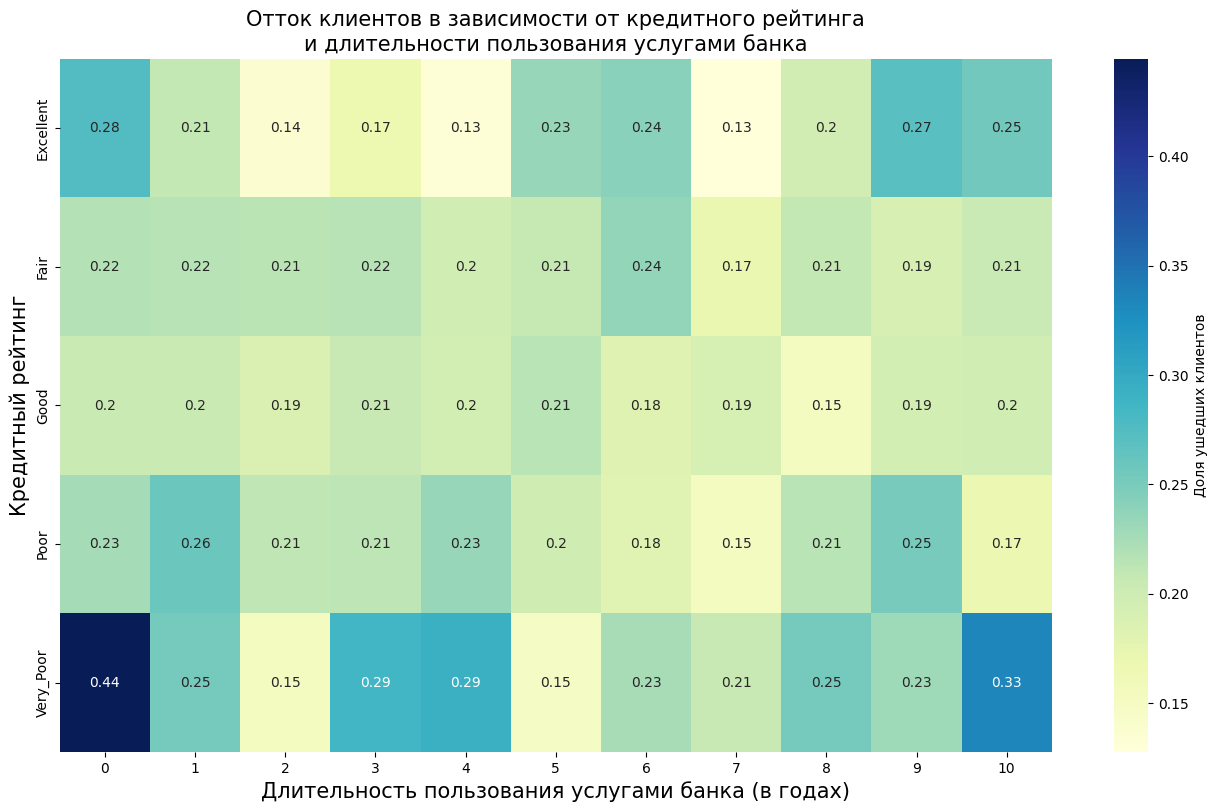

In [14]:
df['CreditScoreCat'] = df['CreditScore'].apply(get_credit_score_cat)

df_10 = df.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean',
    fill_value=0
)

df_10.reindex(['Very_Poor', 'Poor', 'Fair', 'Good', 'Excellent'])

df_10.columns = df_10.columns.astype('string')

fig_10 = plt.figure(figsize=(16, 9))
axes_10 = sns.heatmap(
    data=df_10,
    cmap='YlGnBu',
    annot=True,
    cbar_kws={'label': 'Доля ушедших клиентов'}
);

axes_10.set_title('''Отток клиентов в зависимости от кредитного рейтинга
и длительности пользования услугами банка''', fontsize=15);
axes_10.set_xlabel('Длительность пользования услугами банка (в годах)', fontsize=15);
axes_10.set_ylabel('Кредитный рейтинг', fontsize=15);
axes_10.set_yticklabels(axes_10.get_yticklabels(), rotation=90);

Больше всего отток наблюдается в группе клиентов с очень низким кредитным рейтингом и длительностью пользования услугами до 1 года. Доля ушедших в ней составляет около 44%. В целом, клиенты с низким кредитным рейтингом, не зависимо от длительности пользования услугами банка, уходят чаще остальным. Одновременно с этим можем наблюдать уход клиентов с превосходным кредитным рейтингом. Больше всего наблюдается в группе, где длительность пользования услугами банка составляет до 1 года или 9-10 лет.